<a href="https://colab.research.google.com/github/PTson2207/Classification-WBC/blob/main/First_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import csv
import cv2
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import  np_utils
from keras.preprocessing.image import  ImageDataGenerator
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
num_classes = 5
epochs = 50
BASE_DIR = '../'
batch_size = 32

In [3]:
def get_data(folder):
    X = []
    y = []

    for wbc_type in os.listdir(folder):
        if not wbc_type.startswith('.'):
            for image_filename in os.listdir(folder + wbc_type):
                img_file = cv2.imread(folder + wbc_type + '/' + image_filename)
                if img_file is not None:
                    img_file = cv2.resize(img_file, (160,120))
                    img_arr = np.asarray(img_file)
                    X.append(img_arr)
                    y.append(wbc_type)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [4]:
X_train, y_train = get_data(BASE_DIR + "/content/drive/MyDrive/WBC_classification/Data/TRAIN/")

In [5]:
print("X_train shape:",X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (5000, 120, 160, 3)
y_train shape: (5000,)


In [6]:
X_test, y_test = get_data(BASE_DIR + "/content/drive/MyDrive/WBC_classification/Data/TEST/")

In [7]:
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_test shape: (1733, 120, 160, 3)
y_test shape: (1733,)


image: (120, 160, 3) label: lymphocyte
image: (120, 160, 3) label: lymphocyte
image: (120, 160, 3) label: lymphocyte
image: (120, 160, 3) label: lymphocyte
image: (120, 160, 3) label: lymphocyte
image: (120, 160, 3) label: lymphocyte
image: (120, 160, 3) label: lymphocyte
image: (120, 160, 3) label: lymphocyte
image: (120, 160, 3) label: lymphocyte


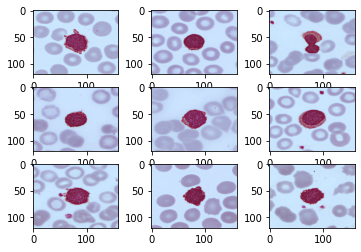

In [8]:
import matplotlib.pyplot as plt

# Plot 9 images
for i, image in enumerate(X_train[:9]):
    # define subplot
    plt.subplot(330 + 1 + i)
    plt.imshow(image)
    print('image:', image.shape, 'label:', y_train[i])
# show the figure
plt.show()

In [17]:
def get_model():
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5 - 1., input_shape=(120, 160, 3), output_shape=(120, 160, 3)))
    model.add(Conv2D(32, (3, 3), input_shape=(120, 160, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(64))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.0001),
                metrics=['accuracy'])

    return model


In [10]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)

y_train = np_utils.to_categorical(encoded_y_train)
y_test = np_utils.to_categorical(encoded_y_test)

In [11]:
print(y_train)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]


In [12]:
print(y_train.shape)

(5000, 5)


In [13]:
model = get_model()

# fits the model on batches
model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=50,
    shuffle=True,
    batch_size=32)

Epoch 1/50
125/125 [==============================] - 35s 42ms/step - loss: 1.1638 - accuracy: 0.4666 - val_loss: 10.2770 - val_accuracy: 0.0000e+00
Epoch 2/50
125/125 [==============================] - 5s 37ms/step - loss: 0.3653 - accuracy: 0.8771 - val_loss: 16.0604 - val_accuracy: 0.0000e+00
Epoch 3/50
125/125 [==============================] - 5s 37ms/step - loss: 0.3022 - accuracy: 0.8954 - val_loss: 16.5739 - val_accuracy: 0.0000e+00
Epoch 4/50
125/125 [==============================] - 5s 36ms/step - loss: 0.2087 - accuracy: 0.9219 - val_loss: 19.6430 - val_accuracy: 0.0000e+00
Epoch 5/50
125/125 [==============================] - 5s 37ms/step - loss: 0.1869 - accuracy: 0.9302 - val_loss: 21.2545 - val_accuracy: 0.0000e+00
Epoch 6/50
125/125 [==============================] - 5s 36ms/step - loss: 0.1536 - accuracy: 0.9484 - val_loss: 27.7712 - val_accuracy: 0.0000e+00
Epoch 7/50
125/125 [==============================] - 5s 36ms/step - loss: 0.1459 - accuracy: 0.9505 - val_loss

In [14]:
y_pred = np.rint(model.predict(X_test))

In [15]:
print("Test Acc score:", accuracy_score(y_test, y_pred))

Test Acc score: 0.8245816503173687


In [16]:
y_test = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)
print(confusion_matrix(y_test, y_pred))

[[214   0   1   1   2]
 [102   0   1   3 170]
 [  0   0 212   2   0]
 [  0   0   5 415   0]
 [  4   0   1  12 588]]
